In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import model.struct_GAN as structure
import model.tester_GAN as tester
import numpy as np
import scipy.io as scio
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from util.my_functions import load_w2v, load_metadata

In [2]:
metadata_path = '../data/metadata.npz'

train_action, train_script, train_length, sentence_steps = load_metadata(metadata_path)

init_pose = scio.loadmat('../data/mean_pose.mat')['mean_vector']

Start downloading preprocessed metadata


In [3]:
w2v_path = '../data/GoogleNews-vectors-negative300.bin'
w2v_model = load_w2v(w2v_path)

Start downloading Google Word2Vec data


In [4]:
dim_sentence = w2v_model['woman'].shape[0]
dim_char_enc = 300
dim_gen = 300
dim_dis = 300
dim_random = 10

action_steps = 100

In [5]:
model = structure.GAN_model(sentence_steps=sentence_steps,
                            action_steps=action_steps,
                            dim_sentence=dim_sentence,
                            dim_char_enc=dim_char_enc,
                            dim_gen=dim_gen,
                            dim_dis=dim_dis
                            )

test_module = tester.GAN_tester(model=model,                               
                               init_pose=init_pose,
                               sentence_steps=sentence_steps,
                               dim_sentence=dim_sentence,
                               dim_char_enc=dim_char_enc,
                               dim_gen=dim_gen,
                               dim_random=dim_random
                               )

In [6]:
test_script = 'a man is throwing something to the front'

line = test_script
line = line.lower()

words = line.split()

tmp_word_array = np.zeros((dim_sentence, len(words)))
vocab_keys = w2v_model.vocab.keys()

for word in words:
    if word not in vocab_keys:
        curr_emb_vec = np.zeros((dim_sentence, ))
    else:
        curr_emb_vec = w2v_model[word]
    tmp_word_array[:, words.index(word)] = curr_emb_vec
    
test_script_array = np.zeros((1, dim_sentence, sentence_steps))
test_script_length = np.zeros(1)

test_script_length = tmp_word_array.shape[1]
test_script_array[0, :, :test_script_length] = tmp_word_array
test_script_length = np.expand_dims(test_script_length, axis=0)

In [7]:
model_dir = '../gan_model/model.ckpt-350'

test_esti = test_module.test(test_script=test_script_array, 
                             test_script_len=test_script_length,
                             model_dir=model_dir,
                             random_seed=-1)
# seed four

INFO:tensorflow:Restoring parameters from ../gan_model/model.ckpt-350


In [8]:
plot_vec = np.squeeze(test_esti)
plot_vec = np.reshape(plot_vec, [8, 3, -1])

mean_len = [0.6, 0.7, 0.9, 0.9, 0.7, 0.9, 0.9]

plot_pose = np.zeros(plot_vec.shape)
plot_pose[1, :, :] = plot_vec[0, :, :];
plot_pose[0, :, :] = plot_pose[1, :, :]+\
                     mean_len[0] * np.divide(plot_vec[1, :, :], 
                                             np.tile(np.linalg.norm(plot_vec[1, :, :], axis=0), (3, 1)))
plot_pose[2, :, :] = plot_pose[1, :, :]+\
                     mean_len[1] * np.divide(plot_vec[2, :, :], 
                                             np.tile(np.linalg.norm(plot_vec[2, :, :], axis=0), (3, 1)))
plot_pose[3, :, :] = plot_pose[2, :, :]+\
                     mean_len[2] * np.divide(plot_vec[3, :, :], 
                                             np.tile(np.linalg.norm(plot_vec[3, :, :], axis=0), (3, 1)))
plot_pose[4, :, :] = plot_pose[3, :, :]+\
                     mean_len[3] * np.divide(plot_vec[4, :, :], 
                                             np.tile(np.linalg.norm(plot_vec[4, :, :], axis=0), (3, 1)))
plot_pose[5, :, :] = plot_pose[1, :, :]+\
                     mean_len[4] * np.divide(plot_vec[5, :, :], 
                                             np.tile(np.linalg.norm(plot_vec[5, :, :], axis=0), (3, 1)))
plot_pose[6, :, :] = plot_pose[5, :, :]+\
                     mean_len[5] * np.divide(plot_vec[6, :, :], 
                                             np.tile(np.linalg.norm(plot_vec[6, :, :], axis=0), (3, 1)))
plot_pose[7, :, :] = plot_pose[6, :, :]+\
                     mean_len[6] * np.divide(plot_vec[7, :, :], 
                                             np.tile(np.linalg.norm(plot_vec[7, :, :], axis=0), (3, 1)))
    

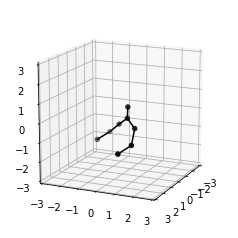

In [12]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.ion()
plt.axis('scaled')

fig.show()
fig.canvas.draw()

for i in xrange(plot_pose.shape[2]):
    ax.clear()

    ax.plot(plot_pose[0:2, 0, i], plot_pose[0:2, 1, i], plot_pose[0:2, 2, i], c='black')
    ax.plot(plot_pose[1:3, 0, i], plot_pose[1:3, 1, i], plot_pose[1:3, 2, i], c='black')
    ax.plot(plot_pose[2:4, 0, i], plot_pose[2:4, 1, i], plot_pose[2:4, 2, i], c='black')
    ax.plot(plot_pose[3:5, 0, i], plot_pose[3:5, 1, i], plot_pose[3:5, 2, i], c='black')
    ax.plot(plot_pose[1:6:4, 0, i], plot_pose[1:6:4, 1, i], plot_pose[1:6:4, 2, i], c='black')
    ax.plot(plot_pose[5:7, 0, i], plot_pose[5:7, 1, i], plot_pose[5:7, 2, i], c='black')
    ax.plot(plot_pose[6:8, 0, i], plot_pose[6:8, 1, i], plot_pose[6:8, 2, i], c='black')

    ax.scatter(plot_pose[:, 0, i], plot_pose[:, 1, i], plot_pose[:, 2, i], c='black')
        
    ax.set_xlim3d(-3, 3)
    ax.set_ylim3d(-3, 3)
    ax.set_zlim3d(-3, 3)
    ax.view_init(15, 0.5*(i-plot_pose.shape[2]/2))

    fig.canvas.draw()   

In [13]:
scio.savemat("../result_GAN.mat", {'esti': test_esti})